## NOTE: I performed these coding in jupyter notebook due to lack of time, I know how to do modular type of coding upto to the production level standards, You can check one of my End- to end project here: https://github.com/SiddharthDaryani/CampusPlacement

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('D:\Assesment\data\instagram_reach.csv')

In [6]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
data= data.drop(labels=['Unnamed: 0','S.No'], axis= 1)

In [9]:
data.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [10]:
data.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [12]:
# Adding blank where no caption
data['Caption']= data['Caption'].fillna(' ')

In [13]:
data.isnull().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [15]:
# sepreting categorical and numerical columns
categorical_columns= data.columns[data.dtypes=='object']
numerical_columns=data.columns[data.dtypes!='object']

In [16]:
data[categorical_columns].describe()

,USERNAME,Caption,Hashtags,Time since posted
count,100,100,100,100
unique,95,95,98,11
top,mikequindazzi,,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours
freq,4,6,2,57


In [17]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Followers,100.0,961.96,1014.62567,11.0,252.75,612.0,1197.0,4496.0
Likes,100.0,46.48,55.08698,8.0,19.00,29.0,46.0,349.0


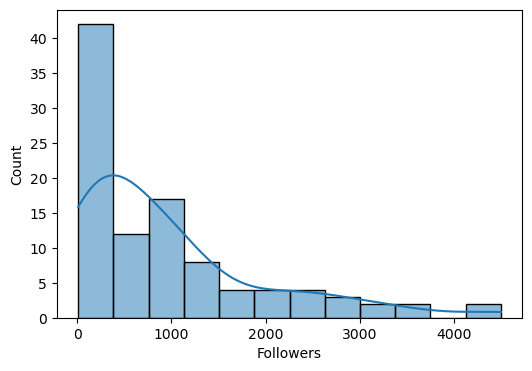

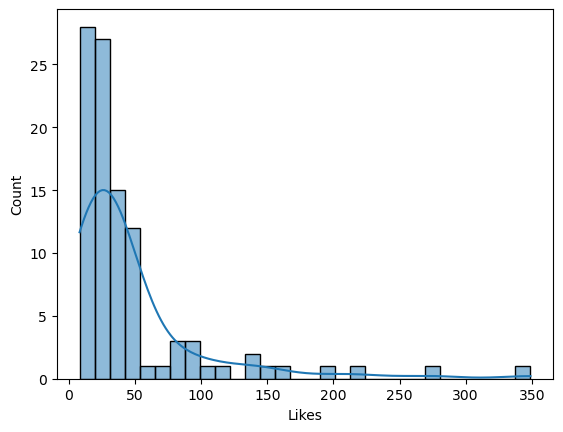

In [18]:
# Numerical Data
plt.figure(figsize=(6,4))

for col in numerical_columns:
    sns.histplot(data= data,x= col, kde= True)
    print('\n')
    plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['USERNAME']=le.fit_transform(data['USERNAME'])
data['Caption']=le.fit_transform(data['Caption'])
data['Hashtags']=le.fit_transform(data['Hashtags'])

In [22]:
data['Time since posted'] = data['Time since posted'].str.extract('(\d+)').astype(int)

In [23]:
# Now we have the encoded data
data

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,64,87,1600,17,11,139
1,29,83,880,97,2,23
2,3,14,255,87,2,25
3,71,90,340,65,3,49
4,23,31,304,64,3,30
...,...,...,...,...,...,...
95,63,7,614,29,3,31
96,30,25,450,88,3,42
97,31,84,182,36,3,10
98,55,86,2039,62,3,222


In [24]:
# Spliting into X and y
X=data.drop(labels=['Time since posted','Likes'],axis=1)

In [25]:
X

,USERNAME,Caption,Followers,Hashtags
0,64,87,1600,17
1,29,83,880,97
2,3,14,255,87
3,71,90,340,65
4,23,31,304,64
...,...,...,...,...
95,63,7,614,29
96,30,25,450,88
97,31,84,182,36
98,55,86,2039,62


In [26]:
y = data[['Time since posted','Likes']]

In [27]:
# Spliting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=30)

In [28]:
X_train

,USERNAME,Caption,Followers,Hashtags
87,69,60,262,59
78,92,62,246,57
24,26,48,166,43
71,61,27,383,37
54,43,17,2785,49
...,...,...,...,...
12,90,52,1061,85
97,31,84,182,36
45,34,36,122,60
99,73,63,741,68


In [29]:
y_train

,Time since posted,Likes
87,2,9
78,2,12
24,2,10
71,2,50
54,7,65
...,...,...
12,9,80
97,3,10
45,2,31
99,3,109


In [31]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
X_train_scaled=scaler.fit_transform(X_train)

In [33]:
X_test_scaled=scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [36]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor()

}

In [37]:
for i in range(len(models)):
    model=list((models.values()))[i]
    print(model)
    
    
r2_list=[]

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()


In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [48]:
def evaluate_model(true, predict):
    r2=r2_score(true, predict)
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    
   

    return r2, mae,mse

In [49]:
for i in range(len(models)):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    R2,MAE,MSE=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)
    
    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: 1903.248233996078
MAE: 19.132529556830505
R2 SCORE: -0.032201112098004414


model training performance Lasso()
MSE: 1902.9818430460782
MAE: 19.113990482837515
R2 SCORE: -0.022130328474570693


model training performance Ridge()
MSE: 1903.2470217686935
MAE: 19.13244678467659
R2 SCORE: -0.03219844662628346


model training performance ElasticNet()
MSE: 1903.0676412937173
MAE: 19.120077618905373
R2 SCORE: -0.026628812232249888


model training performance RandomForestRegressor()
MSE: 2575.313778
MAE: 20.1486
R2 SCORE: -0.5919231225770902




In [41]:
r2_list

[-0.032201112098004414,
 -0.022130328474570693,
 -0.03219844662628346,
 -0.026628812232249888,
 -0.524381346842435]

RandomForestRegressor is the best fit for our model